In [1]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import math
%matplotlib inline

In [2]:
df = pd.read_csv("kc_housing_data_cleaned.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,M,D,Y
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,1955,1955.0,98178,47.5112,-122.257,1340,5650,10,13,2014
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,12,9,2014
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,1933,1933.0,98028,47.7379,-122.233,2720,8062,2,25,2015
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1965,1965.0,98136,47.5208,-122.393,1360,5000,12,9,2014
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1987,1987.0,98074,47.6168,-122.045,1800,7503,2,18,2015


# Isolating the desired zipcode...

In [3]:
unique_zips = df['zipcode'].unique()
unique_zips

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039])

In [4]:
len(unique_zips)

70

In [5]:
zipcode = 98178
zipcode_data = df.loc[df['zipcode'] == zipcode]

In [6]:
# X = zipcode_data[['sqft_living','bathrooms']]
# y = zipcode_data['price']
# X = sm.add_constant(X)
# first_multi = sm.OLS(y,X)
# results = first_multi.fit()
# results.summary()

regression = sm.OLS(zipcode_data['price'], zipcode_data['bedrooms'])
results = regression.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.796
Model:                            OLS   Adj. R-squared (uncentered):              0.795
Method:                 Least Squares   F-statistic:                              1019.
Date:                Sat, 18 Jan 2020   Prob (F-statistic):                    4.13e-92
Time:                        16:40:36   Log-Likelihood:                         -3507.9
No. Observations:                 262   AIC:                                      7018.
Df Residuals:                     261   BIC:                                      7021.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
bedrooms    9.075e+04   2842.639     31.924      0.000    8.52e+04    9.63e+04
==============================================================================
Omnibus:                      235.444   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5722.263
Skew:                           3.516   Prob(JB):                         0.00
Kurtosis:                      24.788   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
df.groupby('zipcode').mean()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,M,D,Y
zipcode,,,,,,,,,,,,,,,,,,,,,
98001,4.651274e+09,2.811949e+05,3.393352,2.011773,1903.783934,14967.002770,1.430748,0.000000,0.094183,3.335180,...,180.027701,1980.867036,1981.371191,47.309106,-122.270704,1830.099723,11218.875346,6.567867,16.470914,2014.321330
98002,4.850894e+09,2.342840e+05,3.326633,1.839196,1627.743719,7517.633166,1.334171,0.000000,0.010050,3.743719,...,105.206030,1967.773869,1968.924623,47.308780,-122.213357,1479.030151,7585.482412,6.698492,16.834171,2014.336683
98003,4.674182e+09,2.941113e+05,3.357143,2.047321,1928.882143,10603.096429,1.310714,0.000000,0.214286,3.371429,...,259.117857,1976.885714,1977.257143,47.315741,-122.310054,1876.196429,9746.178571,6.621429,16.000000,2014.342857
98004,4.394237e+09,1.356524e+06,3.854890,2.527603,2909.022082,13104.220820,1.432177,0.003155,0.305994,3.495268,...,489.179811,1971.470032,1975.971609,47.616183,-122.205189,2674.700315,12805.022082,6.353312,15.283912,2014.337539
98005,4.961872e+09,8.102897e+05,3.851190,2.424107,2656.803571,19928.785714,1.279762,0.000000,0.095238,3.696429,...,485.952381,1969.744048,1970.863095,47.611532,-122.167268,2567.863095,18367.773810,6.922619,15.886905,2014.297619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98177,3.934998e+09,6.764194e+05,3.396078,2.100000,2323.333333,11904.403922,1.276471,0.003922,0.811765,3.494118,...,473.482353,1960.843137,1963.576471,47.742381,-122.369282,2186.196078,11690.239216,6.564706,16.164706,2014.290196
98178,4.291467e+09,3.106128e+05,3.305344,1.731870,1729.351145,8309.122137,1.185115,0.034351,0.534351,3.320611,...,396.068702,1955.232824,1957.332061,47.499118,-122.246969,1648.816794,8149.641221,6.885496,16.465649,2014.293893
98188,4.481851e+09,2.890783e+05,3.433824,1.863971,1802.772059,10126.080882,1.227941,0.000000,0.147059,3.330882,...,301.470588,1965.507353,1966.352941,47.447310,-122.280993,1636.279412,9752.801471,6.205882,16.441176,2014.389706


Plotting the postcode vs the average sale price. This analysis aims to see how the importance of variables change with the price of the property.

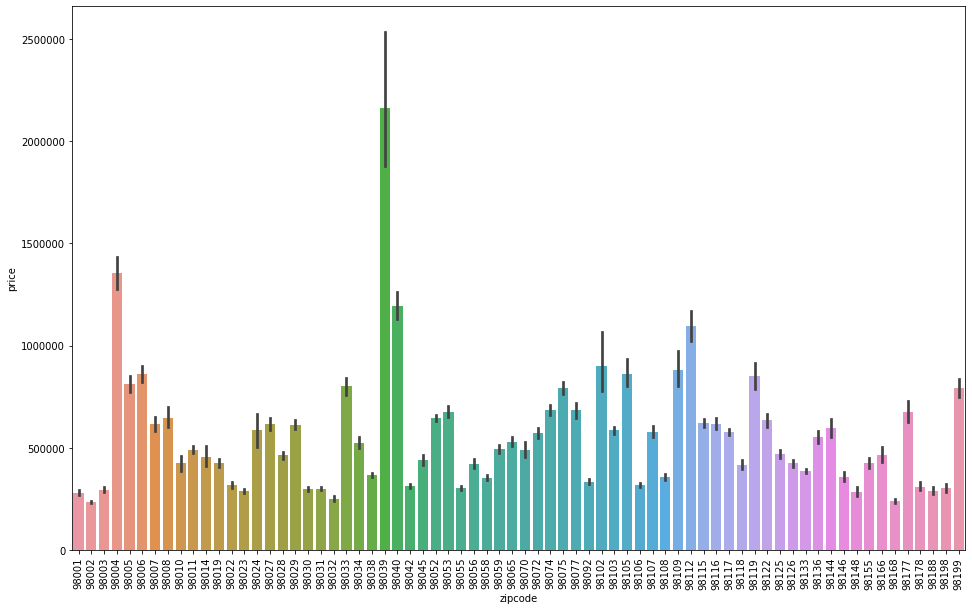

In [8]:
plt.figure(figsize=(16, 10))
sns.barplot(x='zipcode',y='price',data=df)
plt.xticks(rotation=90)
plt.show()

Zipcode 9803 has the highest average house price. 

In [9]:
zipcode_98039 = df.loc[df['zipcode'] == 98039]
zipcode_98039

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,M,D,Y
2972,3625049014,8/29/2014,2950000.0,4,3.50,4860,23885,2.0,0.0,0.0,...,1996,1996.0,98039,47.6172,-122.230,3580,16054,8,29,2014
3757,2540700110,2/12/2015,1910000.0,4,3.50,4210,18564,2.0,0.0,0.0,...,2001,2001.0,98039,47.6206,-122.225,3520,18564,2,12,2015
4073,3262300940,11/7/2014,875000.0,3,1.00,1220,8119,1.0,0.0,0.0,...,1955,1955.0,98039,47.6328,-122.236,1910,8119,11,7,2014
4074,3262300940,2/10/2015,940000.0,3,1.00,1220,8119,1.0,0.0,0.0,...,1955,1955.0,98039,47.6328,-122.236,1910,8119,2,10,2015
4145,6447300265,10/14/2014,4000000.0,4,5.50,7080,16573,2.0,0.0,0.0,...,2008,2008.0,98039,47.6151,-122.224,3140,15996,10,14,2014
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0.0,0.0,...,2001,2001.0,98039,47.6289,-122.233,3560,24345,8,4,2014
4787,2210500019,3/24/2015,937500.0,3,1.00,1320,8500,1.0,0.0,0.0,...,1954,1954.0,98039,47.6187,-122.226,2790,10800,3,24,2015
5173,6447300345,4/6/2015,1160000.0,4,3.00,2680,15438,2.0,0.0,2.0,...,1902,1956.0,98039,47.6109,-122.226,4480,14406,4,6,2015
5584,6447300225,11/6/2014,1880000.0,3,2.75,2620,17919,1.0,0.0,1.0,...,1949,1949.0,98039,47.6144,-122.228,3400,14400,11,6,2014
5874,2525049148,10/7/2014,3420000.0,5,5.00,5450,20412,2.0,0.0,0.0,...,2014,2014.0,98039,47.6209,-122.237,3160,17825,10,7,2014


In [10]:
# X = zipcode_98038[['sqft_living','bedrooms']]
# y = zipcode_98038['price']
# X = sm.add_constant(X)
# first_multi = sm.OLS(y,X)
# results = first_multi.fit()
# results.summary()

regression = sm.OLS(zipcode_98039['price'], zipcode_98039['bedrooms'])
results = regression.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.835
Model:                            OLS   Adj. R-squared (uncentered):              0.831
Method:                 Least Squares   F-statistic:                              247.3
Date:                Sat, 18 Jan 2020   Prob (F-statistic):                    8.83e-21
Time:                        16:40:39   Log-Likelihood:                         -761.55
No. Observations:                  50   AIC:                                      1525.
Df Residuals:                      49   BIC:                                      1527.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
bedrooms    5.389e+05   3.43e+04     15.725      0.000     4.7e+05    6.08e+05
==============================================================================
Omnibus:                       23.886   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.871
Skew:                           1.531   Prob(JB):                     3.62e-09
Kurtosis:                       6.046   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
zipcode_98001 = df.loc[df['zipcode'] == 98001]
zipcode_98001

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,M,D,Y
38,7895500070,2/13/2015,240000.0,4,1.00,1220,8075,1.0,0.0,0.0,...,1969,1969.0,98001,47.3341,-122.282,1290,7800,2,13,2015
67,3717000160,10/9/2014,287000.0,4,2.50,2240,4648,2.0,0.0,0.0,...,2005,2005.0,98001,47.3378,-122.257,2221,4557,10,9,2014
114,8961960160,10/28/2014,480000.0,4,2.50,3230,16171,2.0,0.0,0.0,...,2001,2001.0,98001,47.3183,-122.253,2640,8517,10,28,2014
213,4014400292,1/14/2015,465000.0,3,2.50,2714,17936,2.0,0.0,0.0,...,2005,2005.0,98001,47.3185,-122.275,2590,18386,1,14,2015
292,1115450240,10/22/2014,360000.0,4,2.50,2160,9528,2.0,0.0,0.0,...,1992,1992.0,98001,47.3341,-122.255,2280,9937,10,22,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21375,3094000210,1/5/2015,269950.0,3,2.50,2244,4079,2.0,0.0,0.0,...,2012,2012.0,98001,47.2606,-122.254,2077,4078,1,5,2015
21463,6181500120,6/23/2014,312891.0,5,3.00,2300,8214,2.0,0.0,0.0,...,2013,2013.0,98001,47.3052,-122.276,2594,4950,6,23,2014
21495,3304030220,4/21/2015,480000.0,4,2.50,2940,9172,2.0,0.0,0.0,...,2006,2006.0,98001,47.3444,-122.269,2660,7955,4,21,2015
21549,5007500120,2/26/2015,341780.0,4,2.75,2260,4440,2.0,0.0,0.0,...,2014,2014.0,98001,47.3507,-122.291,2260,4563,2,26,2015


In [12]:
# X = zipcode_98001[['sqft_living','bedrooms']]
# y = zipcode_98001['price']
# X = sm.add_constant(X)
# first_multi = sm.OLS(y,X)
# results = first_multi.fit()
# results.summary()

regression = sm.OLS(zipcode_98001['price'], zipcode_98001['bedrooms'])
results = regression.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.897
Model:                            OLS   Adj. R-squared (uncentered):              0.896
Method:                 Least Squares   F-statistic:                              3123.
Date:                Sat, 18 Jan 2020   Prob (F-statistic):                   1.72e-179
Time:                        16:40:39   Log-Likelihood:                         -4653.0
No. Observations:                 361   AIC:                                      9308.
Df Residuals:                     360   BIC:                                      9312.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
bedrooms    8.132e+04   1455.235     55.882      0.000    7.85e+04    8.42e+04
==============================================================================
Omnibus:                      101.490   Durbin-Watson:                   1.851
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              278.383
Skew:                           1.318   Prob(JB):                     3.55e-61
Kurtosis:                       6.400   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
zipcode_98109 = df.loc[df['zipcode'] == 98109]
zipcode_98109

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,M,D,Y
146,809001525,6/25/2014,890000.0,4,1.00,2550,4000,2.0,0.0,0.0,...,1905,1905.0,98109,47.6354,-122.353,2200,4000,6,25,2014
568,809002765,10/22/2014,610000.0,3,1.00,1180,3400,1.5,0.0,0.0,...,1907,1907.0,98109,47.6376,-122.353,1440,3400,10,22,2014
1064,809001070,1/23/2015,550000.0,3,1.00,1520,2500,1.5,0.0,0.0,...,1912,1912.0,98109,47.6347,-122.352,1880,3600,1,23,2015
1096,5457300478,5/13/2015,453500.0,2,1.75,1000,1760,1.0,0.0,0.0,...,1924,1924.0,98109,47.6261,-122.355,2120,2802,5,13,2015
1147,809002435,8/8/2014,725000.0,3,2.50,1940,4000,1.5,0.0,0.0,...,1906,1906.0,98109,47.6372,-122.352,1440,4000,8,8,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20913,3528900771,3/31/2015,600000.0,3,3.25,1690,1473,2.0,0.0,0.0,...,2008,2008.0,98109,47.6397,-122.345,1670,2594,3,31,2015
20917,2652501565,4/23/2015,1550000.0,3,3.25,3530,4920,2.0,0.0,0.0,...,2015,2015.0,98109,47.6410,-122.357,1900,4200,4,23,2015
20934,1689401526,3/23/2015,605000.0,3,2.50,1500,1119,3.0,0.0,2.0,...,2008,2008.0,98109,47.6327,-122.346,1500,1057,3,23,2015
21001,1972205633,7/23/2014,550000.0,3,2.00,1420,1369,2.5,0.0,0.0,...,2007,2007.0,98109,47.6472,-122.357,1540,2168,7,23,2014


In [14]:
regression = sm.OLS(zipcode_98109['price'], zipcode_98109['bedrooms'])
results = regression.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.837
Model:                            OLS   Adj. R-squared (uncentered):              0.835
Method:                 Least Squares   F-statistic:                              553.2
Date:                Sat, 18 Jan 2020   Prob (F-statistic):                    2.68e-44
Time:                        16:40:39   Log-Likelihood:                         -1560.7
No. Observations:                 109   AIC:                                      3123.
Df Residuals:                     108   BIC:                                      3126.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
bedrooms    2.718e+05   1.16e+04     23.521      0.000    2.49e+05    2.95e+05
==============================================================================
Omnibus:                       38.793   Durbin-Watson:                   1.740
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.595
Skew:                           1.291   Prob(JB):                     1.94e-23
Kurtosis:                       7.045   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
zipcode_98028 = df.loc[df['zipcode'] == 98028]
zipcode_98028

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,M,D,Y
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,1933,1933.0,98028,47.7379,-122.233,2720,8062,2,25,2015
12,114101516,5/28/2014,310000.0,3,1.00,1430,19901,1.5,0.0,0.0,...,1927,1927.0,98028,47.7558,-122.229,1780,12697,5,28,2014
137,4027700812,5/29/2014,452000.0,4,2.25,2590,10002,1.0,0.0,0.0,...,1968,1968.0,98028,47.7689,-122.266,1550,10436,5,29,2014
277,1126049053,11/13/2014,770000.0,4,2.75,3820,26300,2.0,0.0,0.0,...,2014,2014.0,98028,47.7618,-122.261,1860,12136,11,13,2014
284,5634500392,4/10/2015,330000.0,3,3.00,2420,13959,1.0,0.0,0.0,...,1988,1988.0,98028,47.7486,-122.230,2570,13300,4,10,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21158,9578060420,1/14/2015,525000.0,4,3.00,2650,4924,2.0,0.0,0.0,...,2011,2011.0,98028,47.7734,-122.238,2380,4733,1,14,2015
21233,9578060470,5/8/2014,494000.0,3,2.50,2310,4729,2.0,0.0,0.0,...,2011,2011.0,98028,47.7734,-122.237,2440,4711,5,8,2014
21256,982850080,6/13/2014,415500.0,4,2.50,1750,4779,2.0,0.0,0.0,...,2009,2009.0,98028,47.7608,-122.232,1580,4687,6,13,2014
21349,982850020,9/3/2014,382000.0,3,2.25,1450,4667,2.0,0.0,0.0,...,2009,2009.0,98028,47.7611,-122.233,1490,4667,9,3,2014


In [16]:
regression = sm.OLS(zipcode_98028['price'], zipcode_98028['bedrooms'])
results = regression.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.912
Model:                            OLS   Adj. R-squared (uncentered):              0.911
Method:                 Least Squares   F-statistic:                              2906.
Date:                Sat, 18 Jan 2020   Prob (F-statistic):                   1.57e-150
Time:                        16:40:39   Log-Likelihood:                         -3764.0
No. Observations:                 283   AIC:                                      7530.
Df Residuals:                     282   BIC:                                      7534.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
bedrooms    1.301e+05   2413.088     53.903      0.000    1.25e+05    1.35e+05
==============================================================================
Omnibus:                      182.741   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3426.631
Skew:                           2.242   Prob(JB):                         0.00
Kurtosis:                      19.447   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

What this analysis shows is that there is very little difference in the importance of variables 

In [17]:
# distance_list = []

# for i in range(len(df)) : 
    
#     lat_one_degree = 69
#     long_one_degree = 55.016
    
#     house_lat = df.loc[i, 'lat'] 
#     house_long = df.loc[i, 'long']

#     down_town_lat = 47.6050
#     down_town_long = -122.3344

#     # Pythag
#     # a**2 = b**2 - c**2

#     b_degree_change = down_town_lat - house_lat
#     b_distance = b_degree_change * lat_one_degree

#     c_degree_change = down_town_long - house_long
#     c_distance = c_degree_change * long_one_degree

#     distance_from_town = (b_distance**2 - c_distance**2)**0.5
#     distance_list.append(distance_from_town)

# print(distance_list)

/Users/ravimalde/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars


# Calculating the distance of each house from Downtown Seattle

In [18]:
lat_one_degree = 69
long_one_degree = 55.016

def distance_function(city_lat, city_long, house_lat, house_long):
    
    R = 6372800  # Earth radius in meters
    phi1, phi2 = math.radians(city_lat), math.radians(house_lat)
    dphi       = math.radians(house_lat - city_lat)
    dlambda    = math.radians(house_long - city_long)
    a = math.sin(dphi/2)**2 + \
        math.cos(phi1)*math.cos(phi2)*math.sin(dlambda/2)**2
    
    return 2*R*math.atan2(math.sqrt(a), math.sqrt(1 - a))/(1000*1.60934)  #Convert code from meters to miles

city_lat = 47.605
city_long = -122.3344
    
house_lat = df.loc[0, 'lat'] 
house_long = df.loc[0, 'long']
    
distance_function(city_lat, city_long, house_lat, house_long)

7.420144604386407

In [19]:
city_lat = 47.605
city_long = -122.3344
distance_list = []

for i in range(len(df)):
    
    house_lat = df.loc[i, 'lat'] 
    house_long = df.loc[i, 'long']
    
    distance = distance_function(city_lat, city_long, house_lat, house_long)
    
    distance_list.append(distance)

In [20]:
# distance_list

In [21]:
df['Distance to Town'] = distance_list

In [22]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,M,D,Y,Distance to Town
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,1955.0,98178,47.5112,-122.257,1340,5650,10,13,2014,7.420145
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,1991.0,98125,47.7210,-122.319,1690,7639,12,9,2014,8.049092
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,1933.0,98028,47.7379,-122.233,2720,8062,2,25,2015,10.326482
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1965.0,98136,47.5208,-122.393,1360,5000,12,9,2014,6.429078
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1987.0,98074,47.6168,-122.045,1800,7503,2,18,2015,13.508751


<Figure size 1152x864 with 0 Axes>

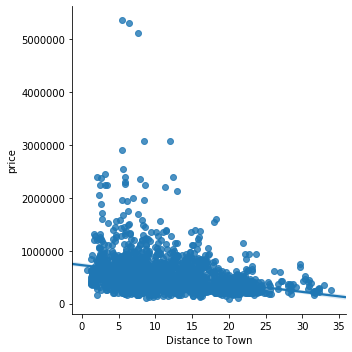

In [23]:
plt.figure(figsize = (16, 12))
sns.lmplot('Distance to Town', 'price', data=df[:2000])
plt.show()

# Identifying outliers

In [24]:
# calculate summary statistics
variable = 'bedrooms'
data_mean, data_std = mean(df[variable]), std(df[variable])
# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
# identify outliers
outliers = [x for x in df[variable] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in df[variable] if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Identified outliers: 62
Non-outlier observations: 21535


In [25]:
len(df)

21597

In [26]:
df_original = df.copy()

In [27]:
variable = 'Distance to Town'
data_mean, data_std = mean(df[variable]), std(df[variable])
cut_off = data_std * 2

for i in range(len(df)):
    if df.loc[i,variable] < (data_mean - cut_off) or df.loc[i,variable] > (data_mean + cut_off):
        df.drop([i], inplace=True)
    else:
        continue
print(len(df))

6.602869429818681
11.50247097164982
21026


In [28]:
variable = 'sqft_living'
data_mean, data_std = mean(df[variable]), std(df[variable])
print(data_std)
print(data_mean)
cut_off = data_std * 2

for i in range(len(df)):
    if df.loc[i,variable] < (data_mean - cut_off) or df.loc[i,variable] > (data_mean + cut_off):
        df.drop([i], inplace=True)
    else:
        continue
print(len(df))

920.0021850660631
2084.3040996861027


KeyError: 99

In [ ]:
X = df[['Distance to Town','sqft_living']]
y = df['price']
X = sm.add_constant(X)
first_multi = sm.OLS(y,X)
results = first_multi.fit()
results.summary()